In [73]:
import pandas as pd

import matplotlib.pyplot as plt

In [74]:
df = pd.read_csv('./barrettII_eyes_clustering - Sheet1.csv')

In [75]:
df.sample(5)

,ID,AL,ACD,WTW,K1,K2,Correto
889,889,"23,14","3,26","12,2","43,6","44,18",S
1040,1040,"20,24","3,51","11,7","48,63",50,S
78,78,"25,41","3,67","12,7","42,72","43,05",S
1269,1269,"25,26","3,03","12,4","45,36","45,61",S
1409,1409,"22,81","3,11","12,1","43,83","44,35",S


In [76]:
df = df.drop('Correto', axis=1)
df = df.drop('ID', axis=1)

In [77]:
df.isna().any()

AL     False
ACD    False
WTW    False
K1     False
K2     False
dtype: bool

In [78]:
df.AL.value_counts()

AL
22,99    12
23,39    11
23,17    11
23,72    11
23,27    10
         ..
26,34     1
24,75     1
21,67     1
25,61     1
26,18     1
Name: count, Length: 447, dtype: int64

In [79]:
df = df.replace(',', '.', regex=True)

In [80]:
df = df.astype(float)

In [81]:
X = df.div(df.sum(axis=1), axis='rows')
X

,AL,ACD,WTW,K1,K2
0,0.187323,0.026142,0.094488,0.343307,0.348740
1,0.194821,0.026847,0.097410,0.332858,0.348064
2,0.194726,0.027795,0.097403,0.339167,0.340909
3,0.193590,0.023836,0.096634,0.341037,0.344903
4,0.203079,0.019980,0.099902,0.335817,0.341222
...,...,...,...,...,...
1523,0.184757,0.026066,0.099033,0.341943,0.348202
1524,0.187074,0.025297,0.103093,0.338779,0.345757
1525,0.201804,0.029523,0.093271,0.334849,0.340553
1526,0.191175,0.021982,0.099992,0.339894,0.346957


In [82]:
from sklearn.cluster import KMeans

#Para definir o melhor K -> critério de cotovelo
distortions = []
n_cluster = range(2,15) #Vou testar de 2 a 14 cluster
for n in n_cluster:
  print(n)
  distortions.append(KMeans(n_clusters=n, max_iter=10_000, n_init=100, random_state=61658).fit(X).inertia_) #Faz a clusterização 100 vezes, tentando 10000 passos para pegar a melhor
  #inertia é a distância entre os clusters

2
3
4
5
6
7
8
9
10
11
12
13
14


In [83]:
distortions

[0.21744377476137688,
 0.1488297873331102,
 0.11787557491142593,
 0.09774532855374955,
 0.08550671561309282,
 0.07795536612970702,
 0.07260887405545431,
 0.06798192066548722,
 0.06426655377396513,
 0.06056996785160958,
 0.05772923794107142,
 0.05501853168270285,
 0.05296592524311923]

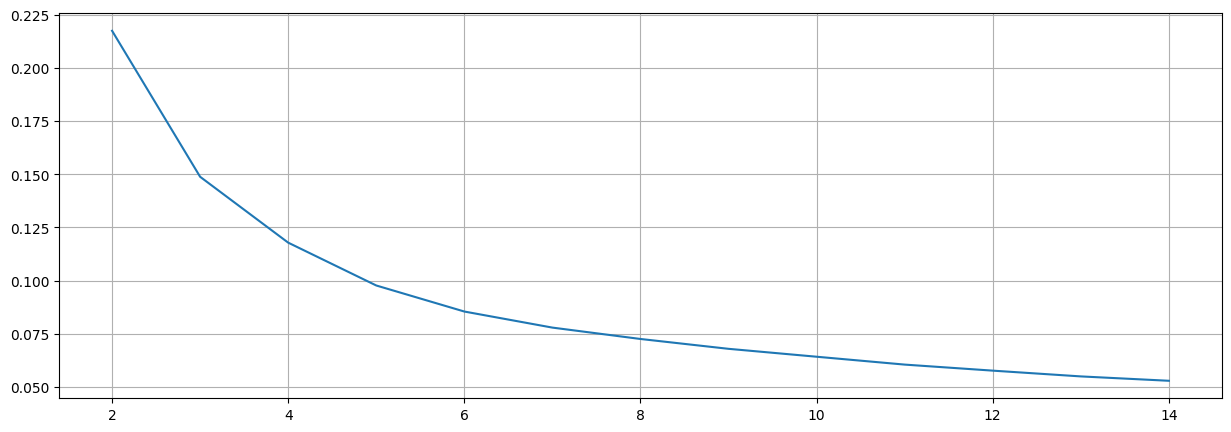

In [84]:
plt.figure(figsize=(15,5))
plt.plot(n_cluster, distortions)
plt.grid()

In [86]:
km = KMeans(n_clusters=3, max_iter=10_000, n_init=100, random_state=61658)
X_t = km.fit_predict(X)
X_t

array([2, 0, 0, ..., 0, 2, 2])